# Coronovirus исследование

Считываем и изучаем таблицу.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

coronovirus_data = pd.read_csv('./datasets/covid_19_data.csv')
coronovirus_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Заменяем названия колонок таблицы на более удобные.

In [56]:
new_column_names = [
                    'sno',
                    'observation_date',
                    'province_state',
                    'country_region',
                    'last_update',
                    'confirmed',
                    'deaths',
                    'recovered'
                   ]
coronovirus_data.set_axis(new_column_names, axis=1, inplace=True)
coronovirus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               3395 non-null   int64  
 1   observation_date  3395 non-null   object 
 2   province_state    2264 non-null   object 
 3   country_region    3395 non-null   object 
 4   last_update       3395 non-null   object 
 5   confirmed         3395 non-null   float64
 6   deaths            3395 non-null   float64
 7   recovered         3395 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 212.3+ KB


Приводим колонки observation_date и last_update к типу данных datetime

In [57]:
coronovirus_data['observation_date'] = pd.to_datetime(coronovirus_data['observation_date'])
coronovirus_data['last_update'] = pd.to_datetime(coronovirus_data['last_update'])
coronovirus_data.dtypes

sno                          int64
observation_date    datetime64[ns]
province_state              object
country_region              object
last_update         datetime64[ns]
confirmed                  float64
deaths                     float64
recovered                  float64
dtype: object

Проверяем таблицу на пропуски

In [58]:
na_columns = coronovirus_data.isna().sum()
na_columns[na_columns > 0]

province_state    1131
dtype: int64

In [59]:
coronovirus_data['province_state'].fillna('unknown', inplace=True)

In [73]:
recent_coronovirus_data = coronovirus_data.sort_values(by='last_update').groupby('country_region').agg({'deaths': 'last', 'confirmed': 'last', 'recovered': 'last'})
recent_coronovirus_data = recent_coronovirus_data[recent_coronovirus_data['deaths'] > 0]
recent_coronovirus_data

,deaths,confirmed,recovered
country_region,,,
France,4.0,285.0,12.0
Hong Kong,2.0,105.0,37.0
Iran,92.0,2922.0,552.0
Iraq,2.0,35.0,0.0
Italy,107.0,3089.0,276.0
Japan,6.0,331.0,43.0
Mainland China,6.0,576.0,502.0
Others,6.0,706.0,10.0
Philippines,1.0,3.0,1.0


Узнаем медианные значие полей deaths, confirmed, recovered

In [71]:
mean_values = recent_coronovirus_data[['deaths', 'confirmed', 'recovered']].median()
mean_values

deaths         3.0
confirmed    253.5
recovered     21.5
dtype: float64

Узнаем в каких странах достигаются медианные значения

In [46]:
coronovirus_data[(coronovirus_data['deaths'] == mean_values['deaths']) | (coronovirus_data['confirmed'] == mean_values['confirmed']) | (coronovirus_data['recovered'] == mean_values['recovered'])]['country_region'].unique()

array(['Mainland China', 'Others', 'Italy', 'France'], dtype=object)

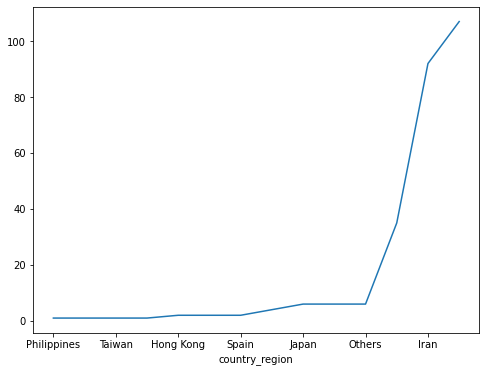

In [47]:
recent_coronovirus_data.sort_values(by='deaths')['deaths'].plot(figsize=(8, 6))